Assignment - 04

Team Name : Smart Lender-Applicant Credibility Prediction For Loan Approval.

Team ID	PNT2022TMID31356

Problem Statement: Customer Segmentation Analysis

Problem Statement You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly. Perform the given Tasks to complete the assignment:- Clustering the data and performing classification algorithms

In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets


In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:

df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [8]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


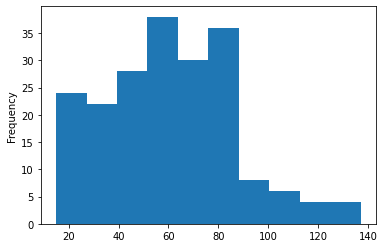

In [10]:
#Univariate Analysis
df["Annual Income (k$)"].plot(kind='hist');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


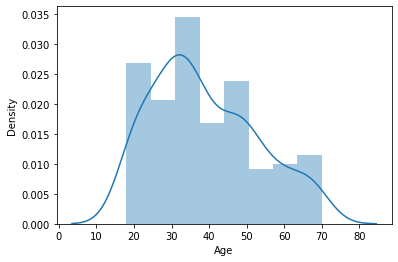

In [11]:
sns.distplot(df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


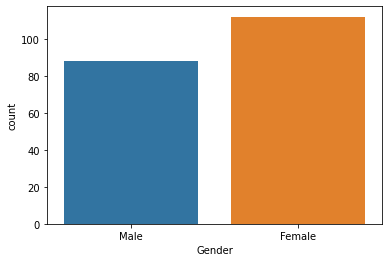

In [12]:
sns.countplot(df.Gender)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


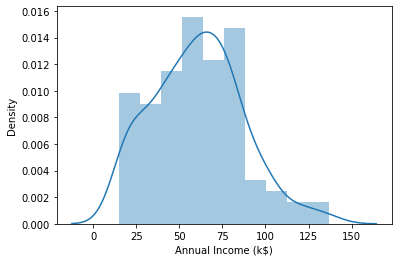

In [13]:
sns.distplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


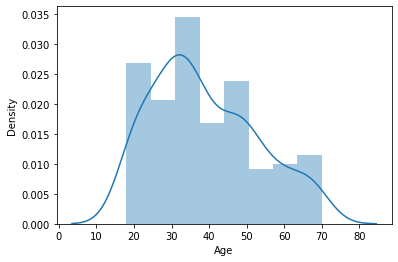

In [14]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


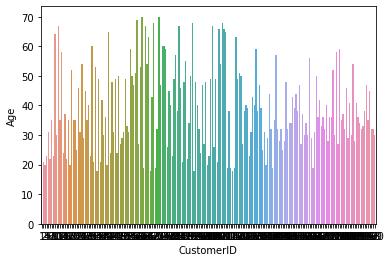

In [16]:
#Bi- Variate Analysis
sns.barplot(df.CustomerID,df.Age)

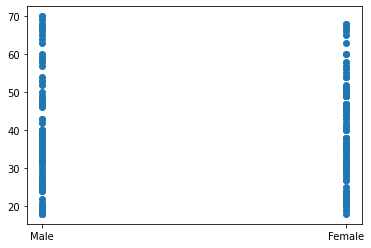

In [17]:
plt.scatter(df.Gender,df.Age)

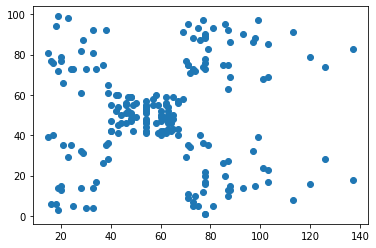

In [18]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

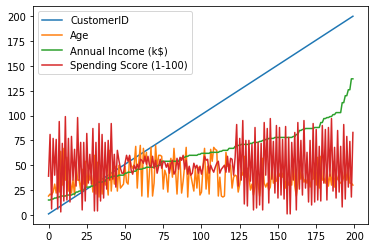

In [20]:
#Multi-Variate Analysis
df.plot.line()

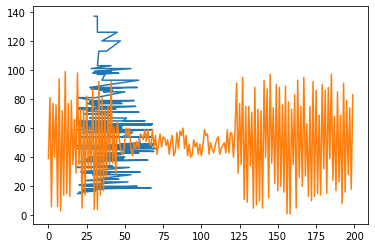

In [21]:
plt.plot(df.Age,df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [24]:
#descriptive statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [26]:
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [27]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [31]:
#Check for Missing values
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [32]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


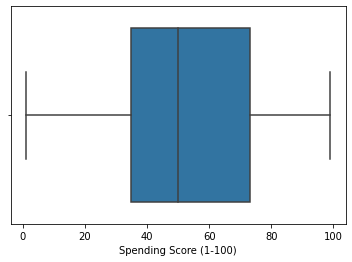

In [35]:
#Find the outliers and replacing outliers
sns.boxplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


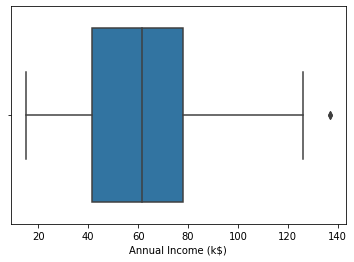

In [34]:
sns.boxplot(df['Annual Income (k$)'])

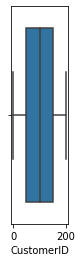

In [36]:
plt.subplot(1, 5, 1)
sns.boxplot(x=df['CustomerID'])


In [37]:
#Check for Categorical columns
s = pd.Series(["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"], dtype="category")
s

0                CustomerID
1                    Gender
2                       Age
3        Annual Income (k$)
4    Spending Score (1-100)
dtype: category
Categories (5, object): ['Age', 'Annual Income (k$)', 'CustomerID', 'Gender',
                         'Spending Score (1-100)']

In [45]:
#Scaling the data
x =df[['CustomerID','Age']]
x.head()


,CustomerID,Age
0,1,19
1,2,21
2,3,20
3,4,23
4,5,31


In [46]:
#perform any of the clustering algorithms

(-15.0, 15.0)

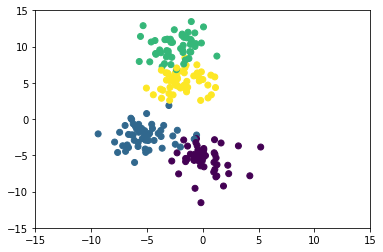

In [47]:
#K-Means Clustering Algorithm
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
points = data[0]
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

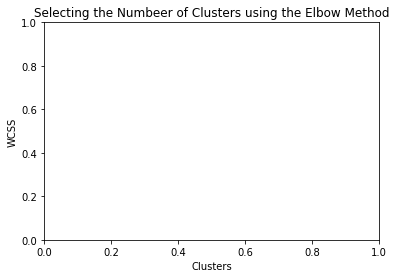

In [48]:
#Add the cluster data with the primary dataset
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
#Split the data into dependent and independent variables
X= df.iloc[:,:-1]
X

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [56]:
y = df.iloc[:,:-1].values
y

array([[1, 'Male', 19, 15],
       [2, 'Male', 21, 15],
       [3, 'Female', 20, 16],
       [4, 'Female', 23, 16],
       [5, 'Female', 31, 17],
       [6, 'Female', 22, 17],
       [7, 'Female', 35, 18],
       [8, 'Female', 23, 18],
       [9, 'Male', 64, 19],
       [10, 'Female', 30, 19],
       [11, 'Male', 67, 19],
       [12, 'Female', 35, 19],
       [13, 'Female', 58, 20],
       [14, 'Female', 24, 20],
       [15, 'Male', 37, 20],
       [16, 'Male', 22, 20],
       [17, 'Female', 35, 21],
       [18, 'Male', 20, 21],
       [19, 'Male', 52, 23],
       [20, 'Female', 35, 23],
       [21, 'Male', 35, 24],
       [22, 'Male', 25, 24],
       [23, 'Female', 46, 25],
       [24, 'Male', 31, 25],
       [25, 'Female', 54, 28],
       [26, 'Male', 29, 28],
       [27, 'Female', 45, 28],
       [28, 'Male', 35, 28],
       [29, 'Female', 40, 29],
       [30, 'Female', 23, 29],
       [31, 'Male', 60, 30],
       [32, 'Female', 21, 30],
       [33, 'Male', 53, 33],
       [34, 'Mal

In [58]:
#Split the data into training and testing
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df['Gender']
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)


x_train.head()

,CustomerID,Gender,Age,Annual Income (k$)
108,109,Male,68,63
107,108,Male,54,63
189,190,Female,36,103
14,15,Male,37,20
56,57,Female,51,44


In [62]:
x_train.shape



(160, 4)

In [63]:


y_test.shape

(40,)

In [69]:
#Train the Model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)
x_train[0:10]

,CustomerID,Gender,Age,Annual Income (k$)
190,191,Female,34,103
7,8,Female,23,18
26,27,Female,45,28
138,139,Male,19,74
58,59,Female,27,46
72,73,Female,60,50
103,104,Male,26,62
199,200,Male,30,137
56,57,Female,51,44
116,117,Female,63,65


In [70]:
#Test the Model
x_test[0:10]

,CustomerID,Gender,Age,Annual Income (k$)
59,60,Male,53,46
5,6,Female,22,17
20,21,Male,35,24
198,199,Male,32,137
52,53,Female,31,43
19,20,Female,35,23
162,163,Male,19,81
55,56,Male,47,43
69,70,Female,32,48
2,3,Female,20,16


In [71]:
y_test[0:10]

59       Male
5      Female
20       Male
198      Male
52     Female
19     Female
162      Male
55       Male
69     Female
2      Female
Name: Gender, dtype: object